# Сингулярные разложения

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Немного теории
$$ X = U \Sigma V^{-1}$$

In [2]:
X = np.array([
    [2,-1],
    [3, 2],
    [5,-1],
    [-1,2]
    ])

In [7]:
U, Sigma, V = np.linalg.svd(X)
Sigma, V

(array([6.2695369, 3.1133434]),
 array([[-0.99480159,  0.10183217],
        [-0.10183217, -0.99480159]]))

### Свойства ортогональных матриц


#### Определитель

$$ |U| = \pm 1, \qquad |V| = \pm 1 $$

In [11]:
np.linalg.det(V)

1.0

#### Обратная матрица

$$ U^{-1} = U^{T}, \qquad V^{-1} = V^{T} $$

In [14]:
U, np.linalg.inv(U), U.T

(array([[-0.3335869 ,  0.25411179, -0.81420001,  0.40152873],
        [-0.44353203, -0.73718167, -0.26353743, -0.43633765],
        [-0.80960368,  0.15598689,  0.5056555 ,  0.25401277],
        [ 0.19115701, -0.60634847,  0.10926518,  0.7641084 ]]),
 array([[-0.3335869 , -0.44353203, -0.80960368,  0.19115701],
        [ 0.25411179, -0.73718167,  0.15598689, -0.60634847],
        [-0.81420001, -0.26353743,  0.5056555 ,  0.10926518],
        [ 0.40152873, -0.43633765,  0.25401277,  0.7641084 ]]),
 array([[-0.3335869 , -0.44353203, -0.80960368,  0.19115701],
        [ 0.25411179, -0.73718167,  0.15598689, -0.60634847],
        [-0.81420001, -0.26353743,  0.5056555 ,  0.10926518],
        [ 0.40152873, -0.43633765,  0.25401277,  0.7641084 ]]))

#### Ортонормированный базис

$$ u_i \perp u_j, \qquad |u_i| = 1 $$
$$ v_i \perp v_j, \qquad |v_i| = 1 $$

In [22]:
np.dot(U[:,0], U[:,1]), np.dot(V[:,0], V[:,0])

(0.0, 1.0)

### Проверка разложения

In [23]:
U, Sigma, V

(array([[-0.3335869 ,  0.25411179, -0.81420001,  0.40152873],
        [-0.44353203, -0.73718167, -0.26353743, -0.43633765],
        [-0.80960368,  0.15598689,  0.5056555 ,  0.25401277],
        [ 0.19115701, -0.60634847,  0.10926518,  0.7641084 ]]),
 array([6.2695369, 3.1133434]),
 array([[-0.99480159,  0.10183217],
        [-0.10183217, -0.99480159]]))

#### Преобразование массива в матрицу

In [28]:
def array_to_matr(array, n):
    matr = np.zeros((n, len(array)))
    for i in range(len(array)):
        matr[i][i] = array[i]
    return matr

In [31]:
Sigma_matr = array_to_matr(Sigma, len(X))
print(Sigma_matr)

[[6.2695369 0.       ]
 [0.        3.1133434]
 [0.        0.       ]
 [0.        0.       ]]


#### Проверка

In [34]:
X, np.dot(U,np.dot(Sigma_matr, V)) # матрица V в numpy поучается уже обращенная!!!

(array([[ 2, -1],
        [ 3,  2],
        [ 5, -1],
        [-1,  2]]),
 array([[ 2., -1.],
        [ 3.,  2.],
        [ 5., -1.],
        [-1.,  2.]]))

### Переход к сингулярному базису

$$ X = U \Sigma V^{-1} $$

$$ XV = U \Sigma $$

In [35]:
S = np.dot(X, V.T)
S

array([[-2.09143535,  0.79113726],
       [-2.78074045, -2.29509969],
       [-5.07584013,  0.48564076],
       [ 1.19846593, -1.88777102]])

## Главные направления

In [53]:
# чтение данных
df = pd.read_csv('c-data-1.csv', names =  ["x1", "x2"])
df

,x1,x2
0,5.127884,5.621868
1,4.118981,4.722387
2,3.312904,4.339551
3,7.245514,7.207303
4,5.235659,5.669789
...,...,...
95,6.968994,6.190895
96,3.115119,2.595740
97,0.152080,0.995676
98,8.377515,9.123881


In [54]:
df.describe()

,x1,x2
count,100.000000,100.000000
mean,6.042312,6.259448
std,3.743332,3.219958
min,-0.915139,-0.662178
25%,3.026308,3.669357
50%,6.534700,6.408228
75%,9.265360,9.019165
max,11.941842,12.262044


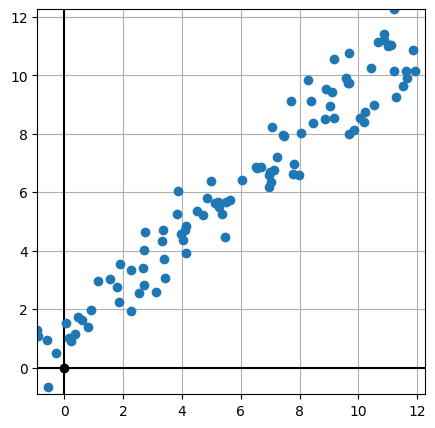

In [55]:
# Визуализаци данных
x = df['x1']
y = df['x2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')

plt.show()

In [60]:
# Сингулярное разложение

X = df.to_numpy()

U, Sigma, V = np.linalg.svd(X)

U, Sigma, V

(array([[-7.62613058e-02, -5.31935059e-02, -4.67232109e-02, ...,
         -2.18189768e-03, -1.18065393e-01, -7.57582530e-02],
        [-6.27161427e-02, -6.29908537e-02, -1.07363386e-01, ...,
         -8.32445509e-02, -8.96089555e-02,  1.14525492e-03],
        [-5.42656294e-02, -1.03753044e-01,  9.87638542e-01, ...,
         -8.28406420e-03, -1.33374867e-02, -2.78094102e-03],
        ...,
        [-8.11584082e-03, -8.28745564e-02, -8.28245134e-03, ...,
          9.93502276e-01, -6.73653049e-03,  2.58352013e-04],
        [-1.24161029e-01, -8.09536803e-02, -1.33412325e-02, ...,
         -6.74078096e-03,  9.80496220e-01, -7.92881335e-03],
        [-7.54853826e-02,  6.54805596e-03, -2.78455362e-03, ...,
          2.55568179e-04, -7.93186850e-03,  9.94621351e-01]]),
 array([99.65054089,  7.24412965]),
 array([[-0.71045197, -0.70374569],
        [ 0.70374569, -0.71045197]]))

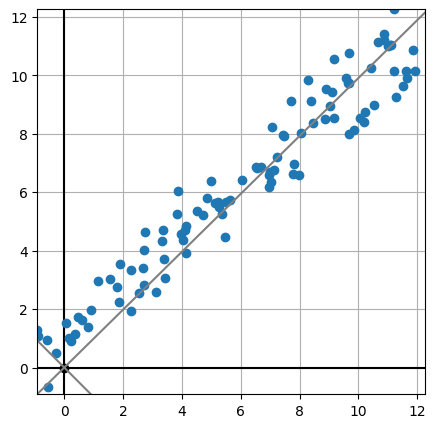

In [64]:
# Сингулярный базис

x = df['x1']
y = df['x2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')

plt.plot(np.arange(l,r+1),(V[0][1]/V[0][0])*np.arange(l,r+1), '-', color='grey')
plt.plot(np.arange(l,r+1),(V[1][1]/V[1][0])*np.arange(l,r+1), '-', color='grey')

plt.show()

In [69]:
# Переход к сингулярному базису

S = np.dot(X, V.T)
df_S = pd.DataFrame(S, columns = ['s1', 's2'])
df_S

,s1,s2
0,-7.599480,-0.385341
1,-6.249698,-0.456314
2,-5.407599,-0.751600
3,-10.219698,-0.021443
4,-7.709774,-0.343541
...,...,...
95,-9.307952,0.506066
96,-4.039883,0.348103
97,-0.808748,-0.600354
98,-12.372714,-0.586439


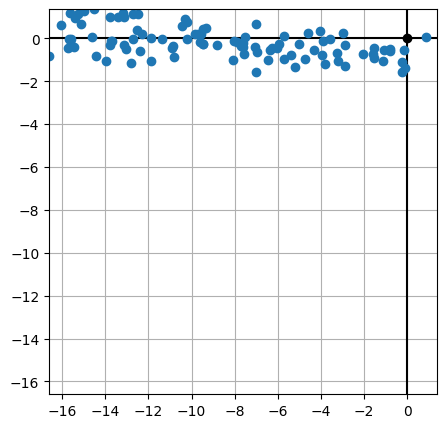

In [70]:
# Визуализаци данных
x = df_S['s1']
y = df_S['s2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')

plt.show()

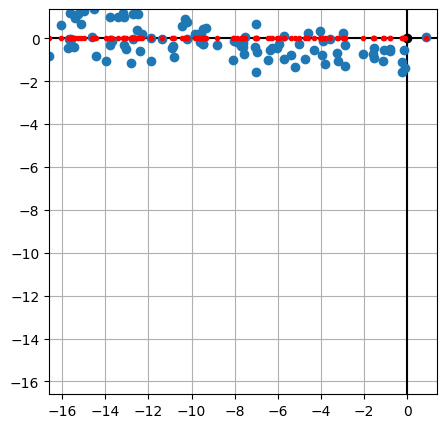

In [71]:
# Проекция данных на главное направление

# Визуализаци данных
x = df_S['s1']
y = df_S['s2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')
plt.plot(x, y*0, '.', color='red')

plt.show()

In [73]:
# Выделение главной компоненты

df_S_reduce = df_S.drop(columns = ['s2'])
df_S_reduce

,s1
0,-7.599480
1,-6.249698
2,-5.407599
3,-10.219698
4,-7.709774
...,...
95,-9.307952
96,-4.039883
97,-0.808748
98,-12.372714


## Решение может быть неверным если данные не центрированы (центр тяжести точек данных не в центре координат)

## Верное решение. Центрирование данных

In [74]:
df['x1'] = df['x1'] - df['x1'].mean()
df['x2'] = df['x2'] - df['x2'].mean()
df

,x1,x2
0,-0.914428,-0.637580
1,-1.923331,-1.537061
2,-2.729408,-1.919897
3,1.203202,0.947855
4,-0.806653,-0.589658
...,...,...
95,0.926682,-0.068552
96,-2.927193,-3.663708
97,-5.890232,-5.263772
98,2.335203,2.864433


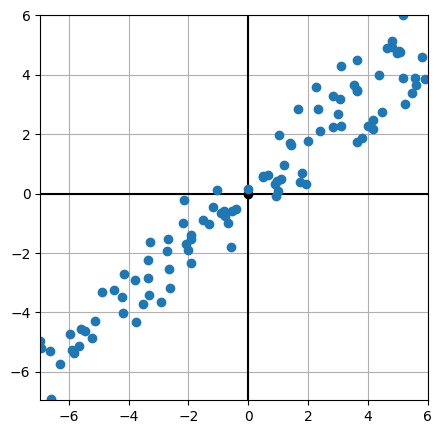

In [75]:
# Визуализаци данных
x = df['x1']
y = df['x2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')

plt.show()

In [76]:
# Сингулярное разложение

X = df.to_numpy()

U, Sigma, V = np.linalg.svd(X)

U, Sigma, V

(array([[-2.27508557e-02, -1.83014799e-02, -7.17195382e-02, ...,
         -1.59823749e-01,  6.68661614e-02, -1.98647980e-02],
        [-5.04668900e-02, -1.37972526e-02, -4.75257077e-02, ...,
          3.91387123e-02, -1.13852205e-01,  5.56809736e-02],
        [-6.81318426e-02, -5.25062507e-02,  9.92956644e-01, ...,
         -9.37473426e-03, -3.25851689e-04,  1.04933524e-03],
        ...,
        [-1.61978304e-01,  2.78558995e-02, -9.01363782e-03, ...,
          9.73119831e-01,  1.58115909e-02, -5.72110399e-03],
        [ 7.45884743e-02, -1.09008179e-01, -7.19595892e-04, ...,
          1.52708102e-02,  9.82270840e-01,  7.80985753e-03],
        [-2.36884185e-02,  5.42141841e-02,  1.22072405e-03, ...,
         -5.43918785e-03,  7.75912570e-03,  9.96465327e-01]]),
 array([48.75786251,  6.02966878]),
 array([[ 0.75964542,  0.65033748],
        [ 0.65033748, -0.75964542]]))

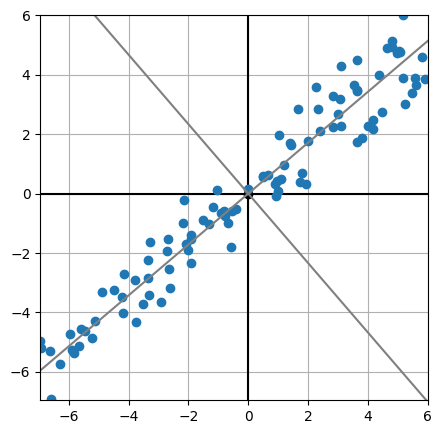

In [77]:
# Сингулярный базис

x = df['x1']
y = df['x2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')

plt.plot(np.arange(l,r+1),(V[0][1]/V[0][0])*np.arange(l,r+1), '-', color='grey')
plt.plot(np.arange(l,r+1),(V[1][1]/V[1][0])*np.arange(l,r+1), '-', color='grey')

plt.show()

In [78]:
# Переход к сингулярному базису

S = np.dot(X, V.T)
df_S = pd.DataFrame(S, columns = ['s1', 's2'])
df_S

,s1,s2
0,-1.109283,-0.110352
1,-2.460658,-0.083193
2,-3.321963,-0.316595
3,1.530433,0.062454
4,-0.996247,-0.076665
...,...,...
95,0.659368,0.654732
96,-4.606275,0.879456
97,-7.897716,0.167962
98,3.636775,-0.657283


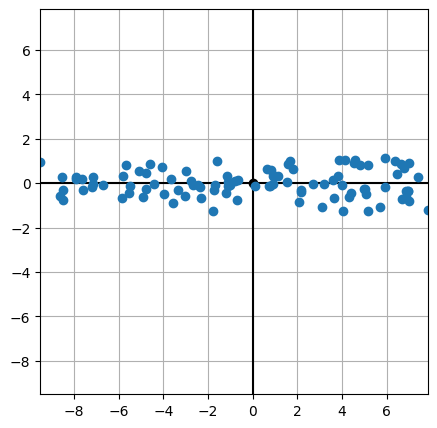

In [79]:
# Визуализаци данных
x = df_S['s1']
y = df_S['s2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')

plt.show()

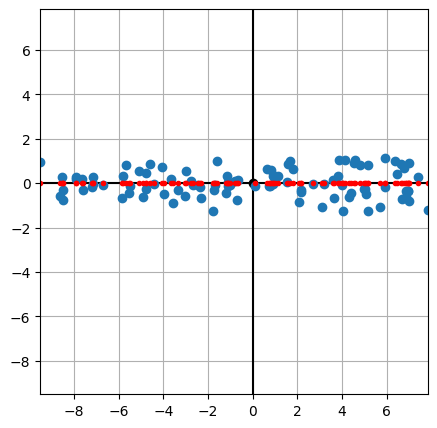

In [80]:
# Проекция данных на главное направление

x = df_S['s1']
y = df_S['s2']

l = min(min(x), min(y))
r = max(max(x), max(y))

plt.figure(figsize=(5,5))

plt.xlim(l,r)
plt.ylim(l,r)

plt.grid()
plt.plot(0,0,'o',color='black')
plt.plot(np.arange(l,r+1),np.arange(l,r+1)*0, '-', color='black')
plt.plot(np.arange(l,r+1)*0,np.arange(l,r+1), '-', color='black')

plt.plot(x, y, 'o')
plt.plot(x, y*0, '.', color='red')

plt.show()

In [81]:
# Выделение главной компоненты

df_S_reduce = df_S.drop(columns = ['s2'])
df_S_reduce

,s1
0,-1.109283
1,-2.460658
2,-3.321963
3,1.530433
4,-0.996247
...,...
95,0.659368
96,-4.606275
97,-7.897716
98,3.636775
